In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
from ivim_tensor import IvimTensorModel

In [3]:
from dipy.core.gradients import gradient_table

In [4]:
gtab = gradient_table('../data/DWI_IVIM6.bval', '../data/DWI_IVIM6.bvec', b0_threshold=0)

In [5]:
img = nib.load('../data/DWI_IVIM6.nii')

In [6]:
data = img.get_fdata()

In [7]:
b0 = np.mean(data[..., gtab.b0s_mask], -1)

In [8]:
from dipy.segment.mask import median_otsu
b0_mask, mask = median_otsu(b0, median_radius=2, numpass=1)

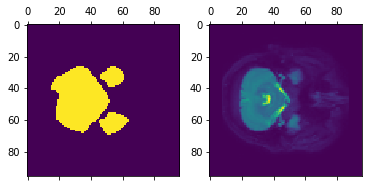

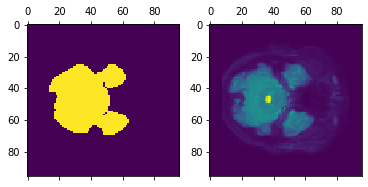

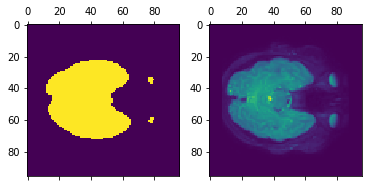

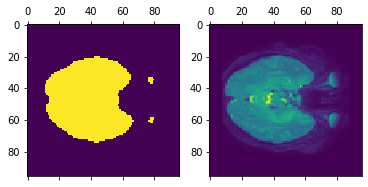

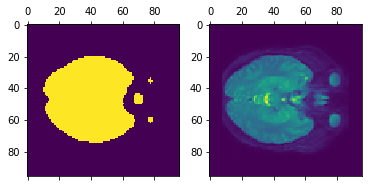

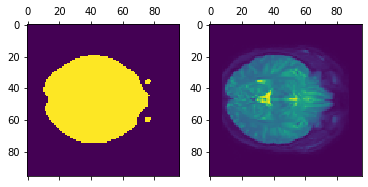

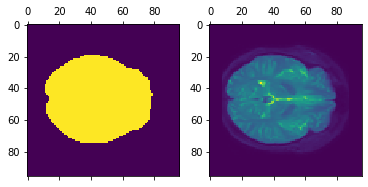

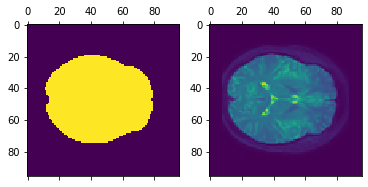

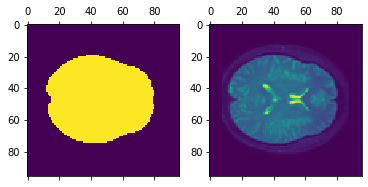

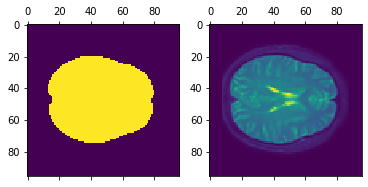

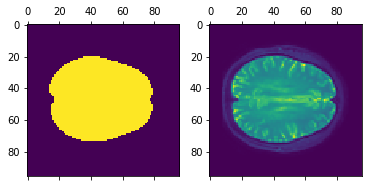

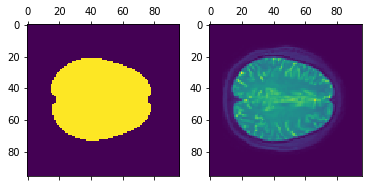

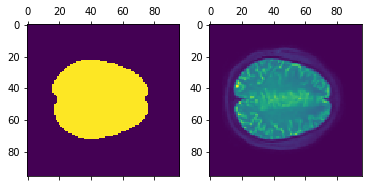

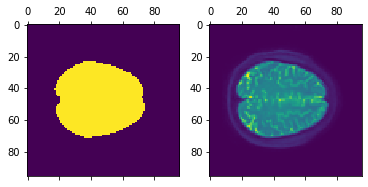

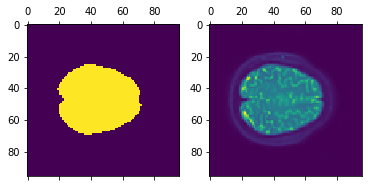

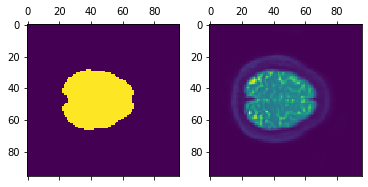

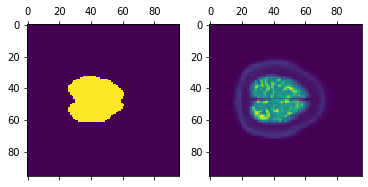

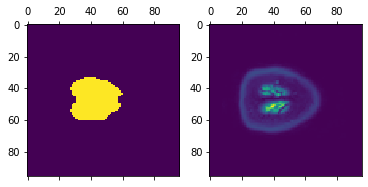

In [9]:
for sl in range(mask.shape[-1]):
    fig, ax = plt.subplots(1, 2)
    ax[0].matshow(mask[:, :, sl])
    ax[1].matshow(data[:, :, sl, 0])

In [10]:
itm = IvimTensorModel(gtab)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:151: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)


In [11]:
itf = itm.fit(data, mask)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:434: UserWarning: x0 obtained from linear fitting is not feasibile as initial guess for leastsq while estimating f and D_star. Using parameters from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:507: UserWarning: x0 is unfeasible for leastsq fitting. Returning x0 values from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:344: UserWarning: Bounds are violated for leastsq fitting. Returning parameters from linear fit
  warnings.warn(warningMsg, UserWarning)
  0%|          | 0/38420 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:112: UserWarning: Setting `xtol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  .format(name, EPS))
100%|███████

In [12]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [13]:
np.save('model_params', itf.model_params)

In [14]:
itf.model_params.shape

(38420, 13)

In [15]:
itf.perfusion_fraction.shape

(38420,)

(array([1222., 6079., 7596., 6142., 3012., 1837., 1292.,  831.,  536.,
        9541.]),
 array([1.63847115e-49, 5.00000000e-02, 1.00000000e-01, 1.50000000e-01,
        2.00000000e-01, 2.50000000e-01, 3.00000000e-01, 3.50000000e-01,
        4.00000000e-01, 4.50000000e-01, 5.00000000e-01]),
 <BarContainer object of 10 artists>)

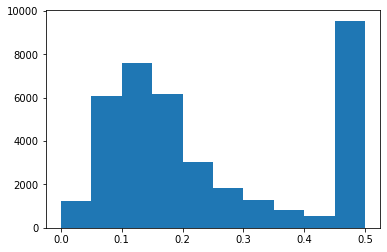

In [16]:
plt.hist(itf.perfusion_fraction)

In [17]:
pf = np.zeros(mask.shape)

In [18]:
pf[mask] = itf.perfusion_fraction

In [19]:
np.sum(np.isnan(itf.perfusion_fraction)) / len(itf.perfusion_fraction)

0.00864133263925039

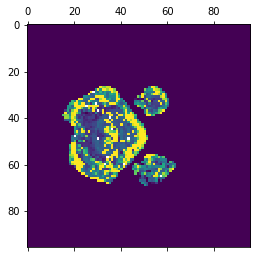

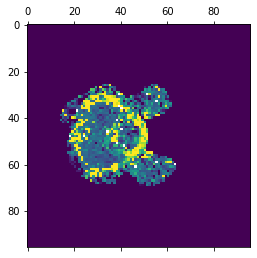

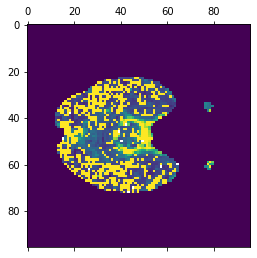

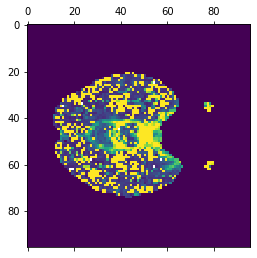

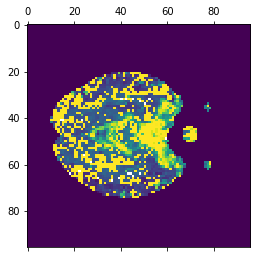

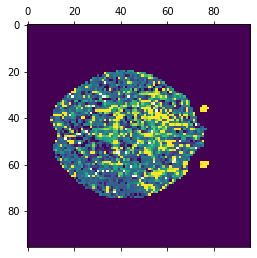

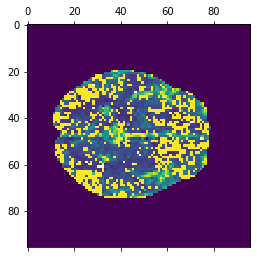

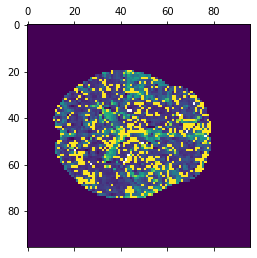

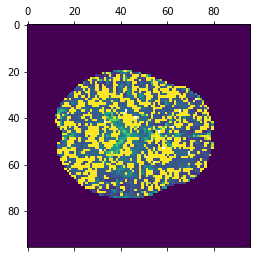

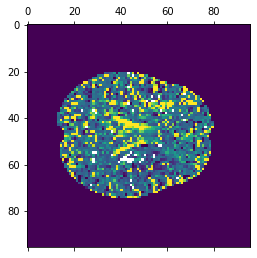

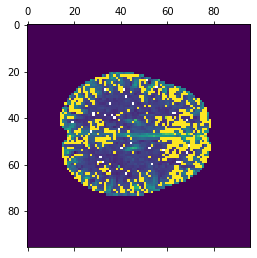

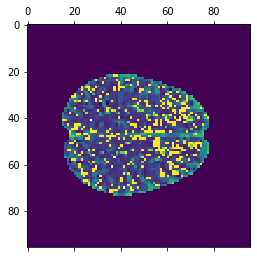

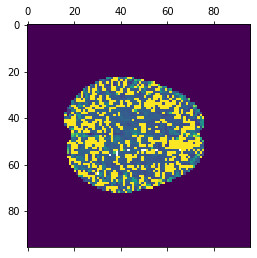

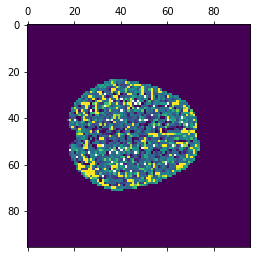

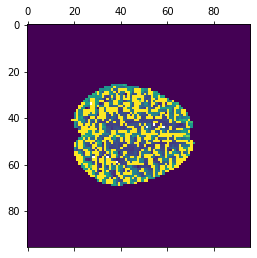

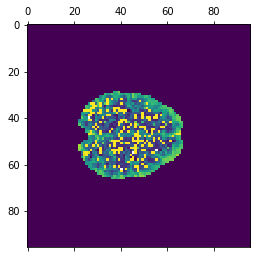

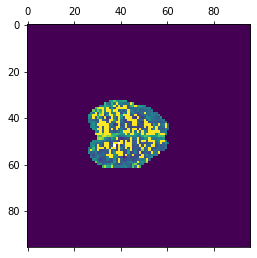

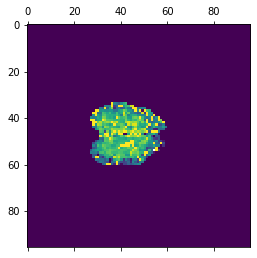

In [20]:
for sl in range(pf.shape[-1]):
    plt.matshow(pf[:, :, sl])

In [21]:
diffusion_cfa = np.zeros((mask.shape + (3,)))

In [22]:
diffusion_cfa[mask] = itf.diffusion_fit.color_fa

In [23]:
ivim_pf = np.zeros(mask.shape)

In [24]:
ivim_pf[mask] = itf.model.ivim_fit.perfusion_fraction

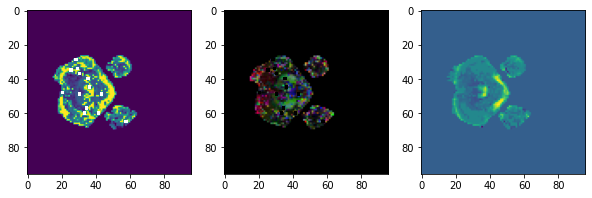

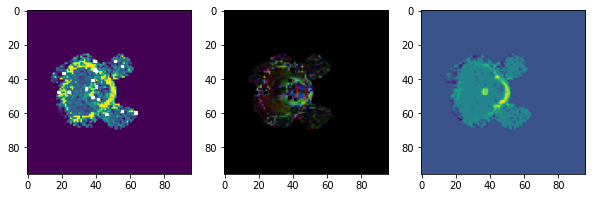

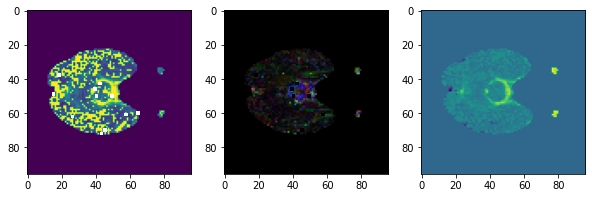

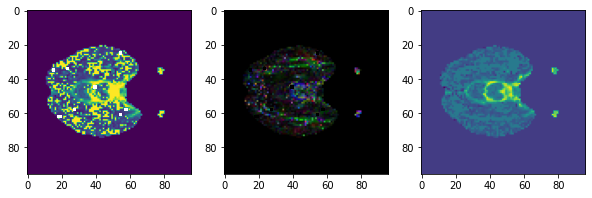

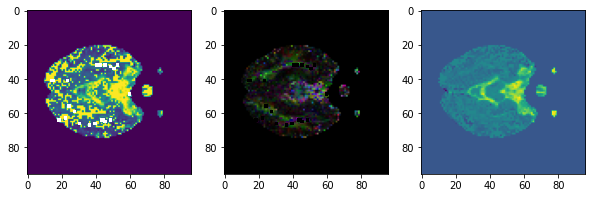

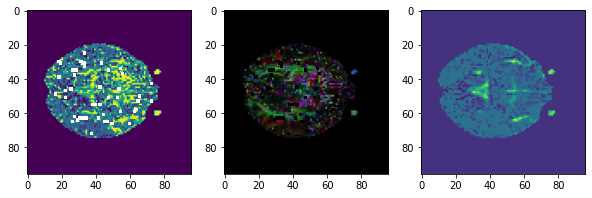

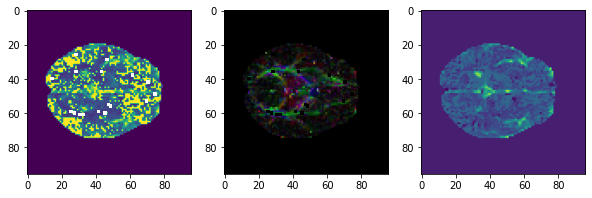

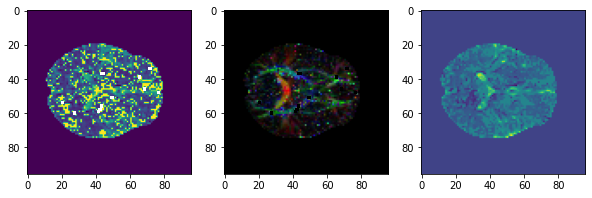

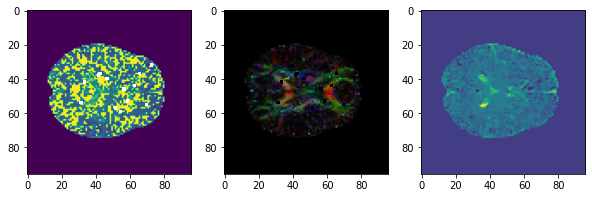

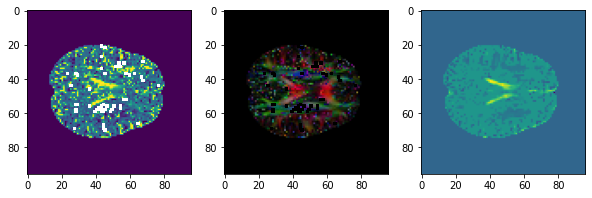

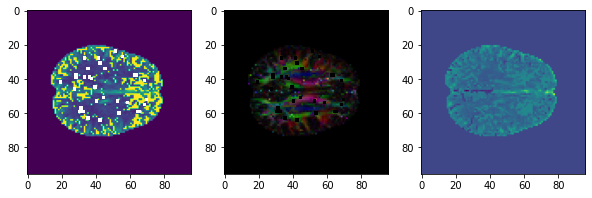

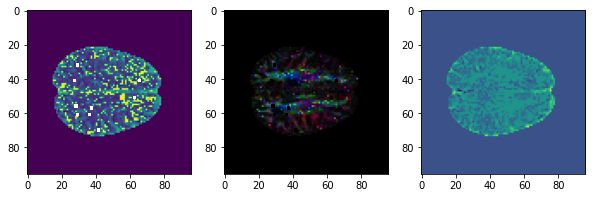

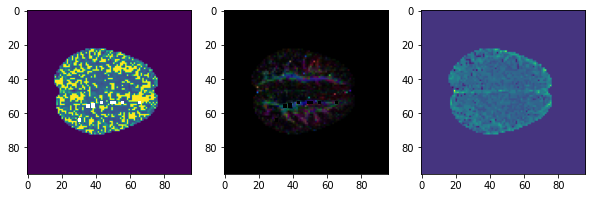

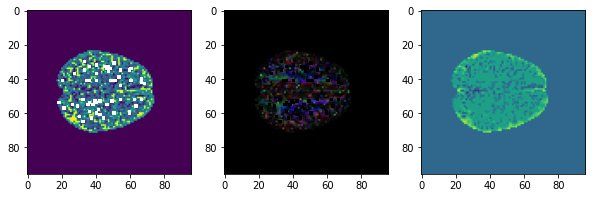

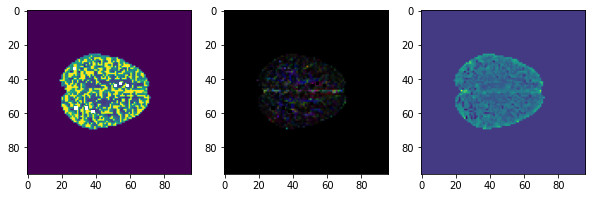

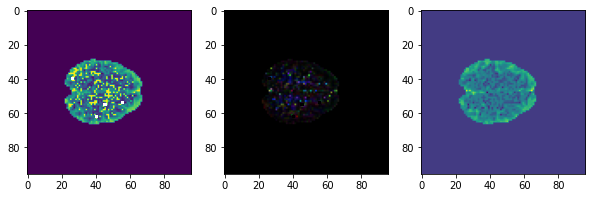

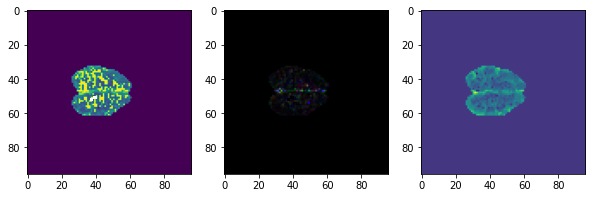

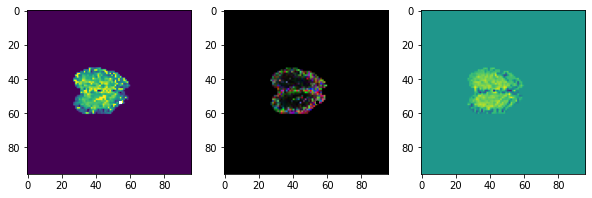

In [25]:
for sl in range(mask.shape[-1]):
    fig, ax = plt.subplots(1, 3, figsize=(10, 8))
    ax[0].imshow(pf[:, :, sl])
    ax[1].imshow(diffusion_cfa[:, :, sl])
    ax[2].imshow(ivim_pf[:, :, sl])

In [26]:
perfusion_cfa = np.zeros((mask.shape + (3,)))

In [27]:
perfusion_cfa[mask] = itf.perfusion_fit.color_fa

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/dti.py:87: RuntimeWarning: invalid value encountered in true_divide
  ((evals * evals).sum(0) + all_zero))


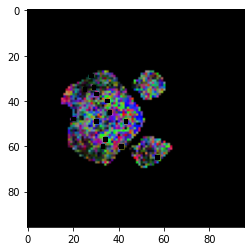

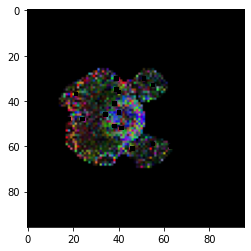

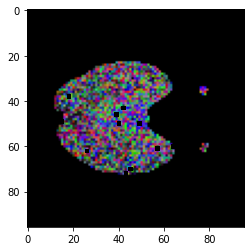

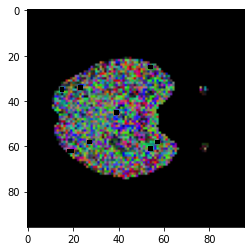

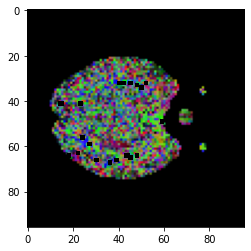

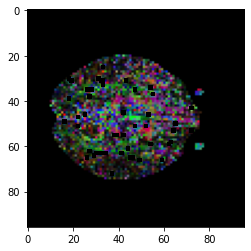

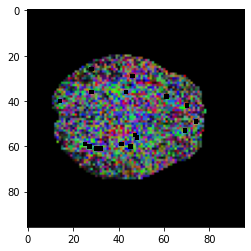

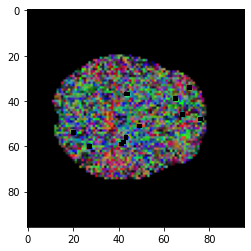

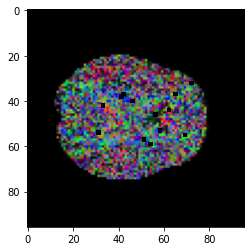

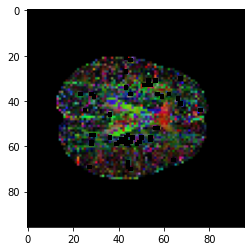

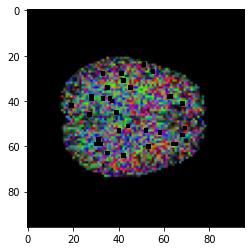

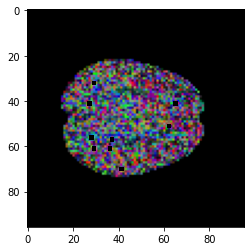

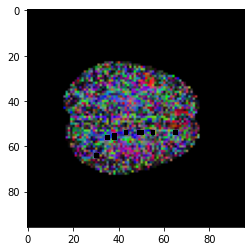

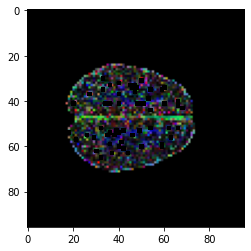

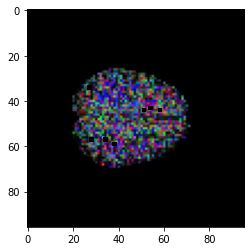

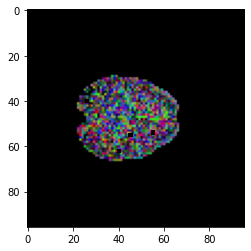

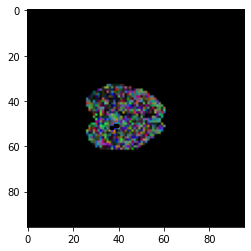

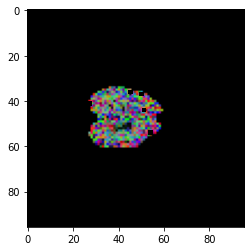

In [28]:
for sl in range(mask.shape[-1]):
    fig, ax = plt.subplots()
    ax.imshow(perfusion_cfa[:, :, sl])

In [29]:
import nibabel as nib

In [30]:
nib.save(nib.Nifti1Image(pf, img.affine), 'perfusion_fraction.nii.gz')

In [31]:
data[np.where(np.isnan(pf))[0]]

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    